In [1]:
import matplotlib.pyplot as plt


# Biocellion Output Plotting
This notebook defines functions to read and plot the biocellion output data for the Biocellion ABM models by the CMMC that can be found in github.com/TheCMMC. For more information on the CMMC visist www.thecmmc.org.  

Currently (March 2021) it has only been used and tested for the ABM-only-microcarriers repository.

To use these plotting functions the biocellion output should be in the following directory structure:
`biocellion-user/$MODEL_NAME/output/log`

In [34]:
def read_summary_file(filename):
    live, dead, removed = ([],[],[])

    with open(filename, 'r' ) as f :
       for line in f:
          if 'Live Cells' in line :
              live.append( int( line.strip().split(':')[-1] ) )
          elif 'Death Cells' in line:
              dead.append( int( line.strip().split(':')[-1] ))
          elif 'Removed Cells' in line :
              removed.append( int( line.strip().split(':')[-1] ))
    
    # if the lengths of these list are different print error
    assert len(live)==len(dead)==len(removed), "Cell count lists are of different lenghts"

    return {"live":live, "dead":dead, "removed":removed}

def plot_single(par_id, trial):
    filename =  f"log_parameter{par_id}_trial{trial}/output.log"
    cell_counts = read_summary_file(filename)

    Npoints = len( cell_counts["live"] )
    tsteps = range( Npoints)

    fig, ax = plt.subplots()
    ax.plot(tsteps, cell_counts["live"], '-b', label='Live')
    ax.plot(tsteps, cell_counts["dead"], '-r', label='Apoptotic')
    ax.plot(tsteps, cell_counts["removed"], '-k', label='Death')
    leg = ax.legend();
    plt.ylabel('Cell count (one microcarrier)')
    plt.xlabel('Time steps')
    plt.savefig("ABMOnly_cell_counts.png", dpi=150)
    
def plot_summary(par_ids, trials, states):
    for par_id in par_ids:
        for trial in trials:
            filename =  f"log_parameter{par_id}_trial{trial}/output.log"

        

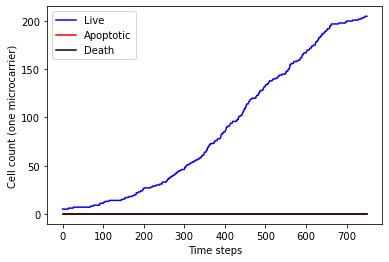

In [36]:
plot_single(4, 5)
plot_summary()